In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import regexp_tokenize
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud


In [2]:
df=pd.read_csv('Malignant_train.csv')
df

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [3]:
df.drop('id',axis=1,inplace=True)

In [4]:
df.shape

(159571, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   comment_text      159571 non-null  object
 1   malignant         159571 non-null  int64 
 2   highly_malignant  159571 non-null  int64 
 3   rude              159571 non-null  int64 
 4   threat            159571 non-null  int64 
 5   abuse             159571 non-null  int64 
 6   loathe            159571 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 8.5+ MB


In [6]:
df.isnull().sum()

comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [7]:
df.corr()

,malignant,highly_malignant,rude,threat,abuse,loathe
malignant,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009
highly_malignant,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600
rude,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128
abuse,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736
loathe,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000


<AxesSubplot:>

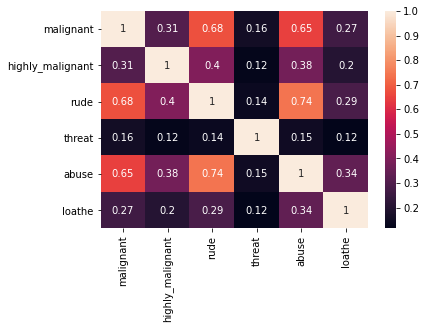

In [8]:
sns.heatmap(df.corr(),annot=True)

In [9]:
df.skew()

malignant            2.745854
highly_malignant     9.851722
rude                 3.992817
threat              18.189001
abuse                4.160540
loathe              10.515923
dtype: float64

0    144277
1     15294
Name: malignant, dtype: int64

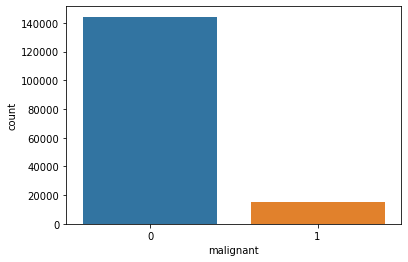

In [10]:
sns.countplot(x=df['malignant'])
df['malignant'].value_counts()

0    157976
1      1595
Name: highly_malignant, dtype: int64

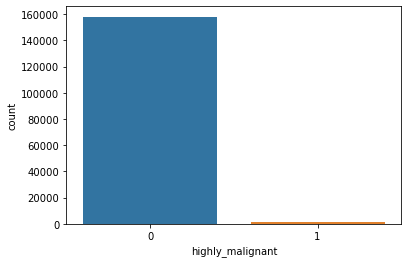

In [11]:
sns.countplot(x=df['highly_malignant'])
df['highly_malignant'].value_counts()

0    151122
1      8449
Name: rude, dtype: int64

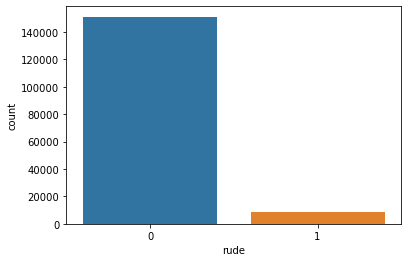

In [12]:
sns.countplot(x=df['rude'])
df['rude'].value_counts()

0    159093
1       478
Name: threat, dtype: int64

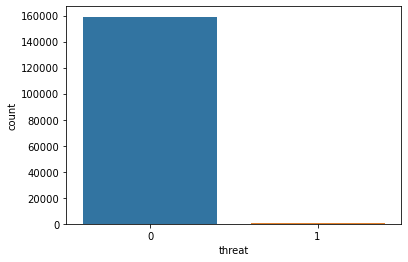

In [13]:
sns.countplot(x=df['threat'])
df['threat'].value_counts()

0    151694
1      7877
Name: abuse, dtype: int64

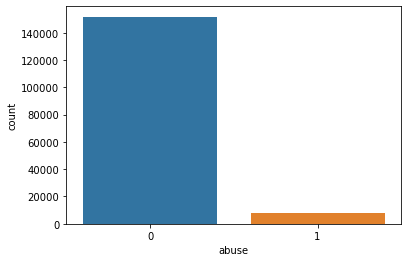

In [14]:
sns.countplot(x=df['abuse'])
df['abuse'].value_counts()

0    158166
1      1405
Name: loathe, dtype: int64

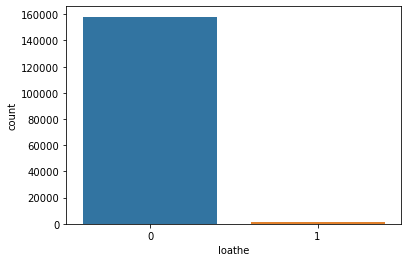

In [15]:
sns.countplot(x=df['loathe'])
df['loathe'].value_counts()

In [16]:
df['length']=df['comment_text'].str.len()

In [17]:
df.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67


In [18]:
#Lowering the caps
df['comment_text']=df['comment_text'].str.lower()

#replace email adress with 'email'
df['comment_text']=df['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

#replace URLs with 'webaddress'
df['comment_text']=df['comment_text'].str.replace(r'^http\://[a-zA-Z0-9]\-\.+\.[a-zA-Z]{2,3}(/\S*)?$', 'webaddress')

#replace money symbols with 'moneysymbol' 
df['comment_text']=df['comment_text'].str.replace(r'£|\$','dollers')

#replace 10digit phone numbers (format include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
df['comment_text']=df['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{4}$','phonenumber')

#replace numbers
df['comment_text']=df['comment_text'].str.replace(r'\d+(\.\d+)?','number')

#Remove punctuations
df['comment_text']=df['comment_text'].str.replace(r'[^\w\d\s]',' ')

#replace whitespace between terms with single space
df['comment_text']=df['comment_text'].str.replace(r'\s+',' ')

#Remove leading and tailing whitespace
df['comment_text']=df['comment_text'].str.replace(r'^\s+|\s+?$',' ')

<ipython-input-18-87972c48ac84>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['comment_text']=df['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')
<ipython-input-18-87972c48ac84>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df['comment_text']=df['comment_text'].str.replace(r'^http\://[a-zA-Z0-9]\-\.+\.[a-zA-Z]{2,3}(/\S*)?$', 'webaddress')
<ipython-input-18-87972c48ac84>:11: FutureWarning: The default value of regex will change from True to False in a future version.
  df['comment_text']=df['comment_text'].str.replace(r'£|\$','dollers')
<ipython-input-18-87972c48ac84>:14: FutureWarning: The default value of regex will change from True to False in a future version.
  df['comment_text']=df['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{4}$','phonenumber')
<ipython-input-18-87972c48ac84>:17: FutureWarning: The default value of regex will change from Tru

In [19]:
stop_words=stopwords.words('english')

df['comment_text']=df['comment_text'].apply(lambda x: ' '.join(
term for term in x.split() if term not in stop_words))

In [20]:
df['clean_length']=df['comment_text'].str.len()

In [21]:
df

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length,clean_length
0,explanation edits made username hardcore metal...,0,0,0,0,0,0,264,172
1,aww matches background colour seemingly stuck ...,0,0,0,0,0,0,112,97
2,hey man really trying edit war guy constantly ...,0,0,0,0,0,0,233,141
3,make real suggestions improvement wondered sec...,0,0,0,0,0,0,622,374
4,sir hero chance remember page,0,0,0,0,0,0,67,29
...,...,...,...,...,...,...,...,...,...
159566,second time asking view completely contradicts...,0,0,0,0,0,0,295,181
159567,ashamed horrible thing put talk page number nu...,0,0,0,0,0,0,99,50
159568,spitzer umm theres actual article prostitution...,0,0,0,0,0,0,81,66
159569,looks like actually put speedy first version d...,0,0,0,0,0,0,116,57


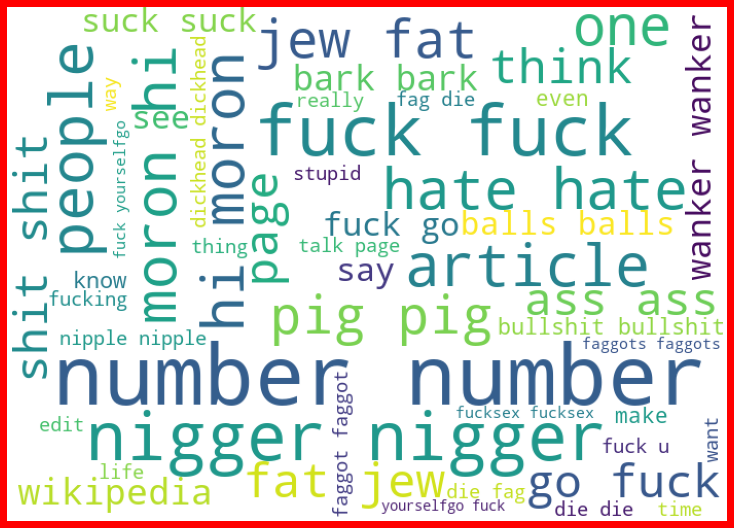

In [22]:
hams=df['comment_text'][df['malignant']==1]
spam_cloud=WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(hams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

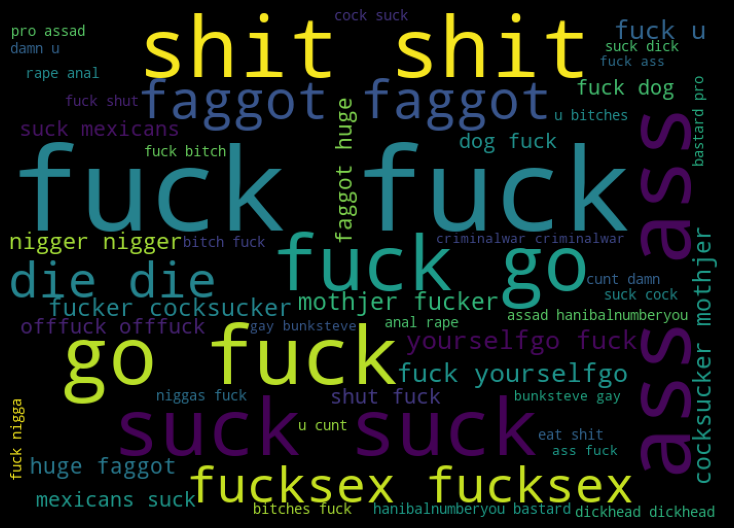

In [23]:
hams=df['comment_text'][df['highly_malignant']==1]
spam_cloud=WordCloud(width=700,height=500,background_color='black',max_words=50).generate(' '.join(hams))

plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

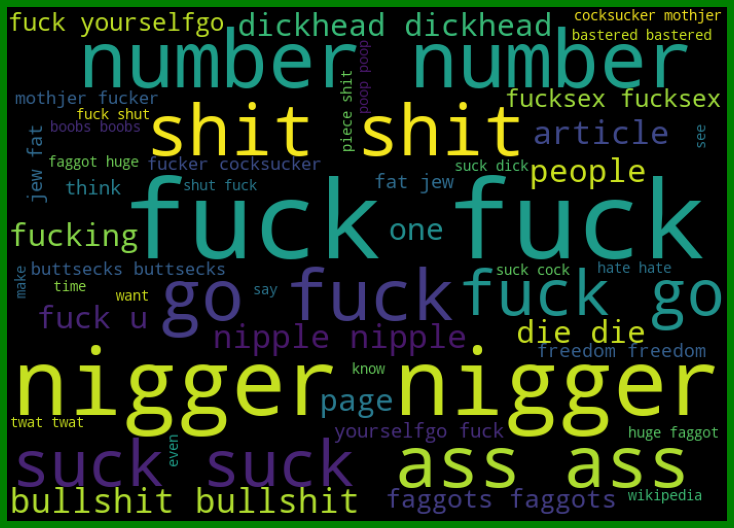

In [24]:
hams=df['comment_text'][df['rude']==1]
spam_cloud=WordCloud(width=700,height=500,background_color='black',max_words=50).generate(' '.join(hams))

plt.figure(figsize=(10,8),facecolor='g')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

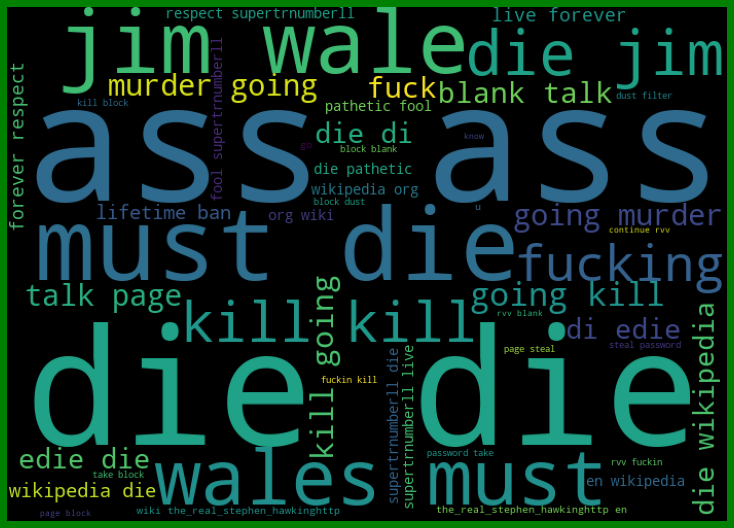

In [25]:
hams=df['comment_text'][df['threat']==1]
spam_cloud=WordCloud(width=700,height=500,background_color='black',max_words=50).generate(' '.join(hams))

plt.figure(figsize=(10,8),facecolor='g')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

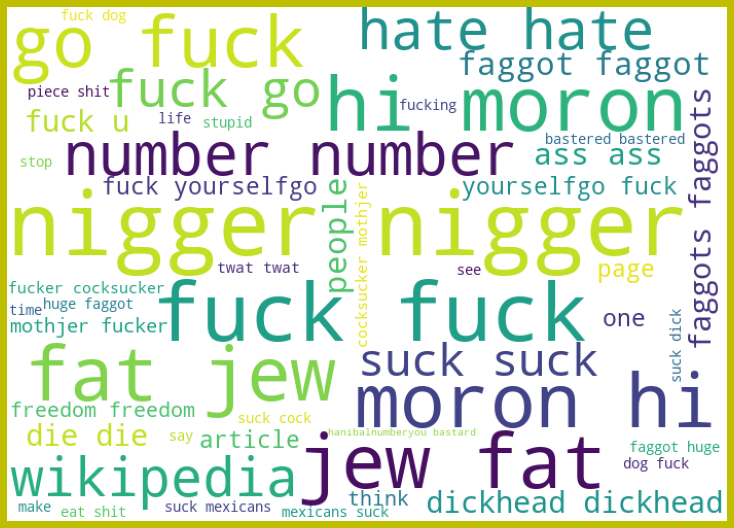

In [26]:
hams=df['comment_text'][df['abuse']==1]
spam_cloud=WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(hams))

plt.figure(figsize=(10,8),facecolor='y')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

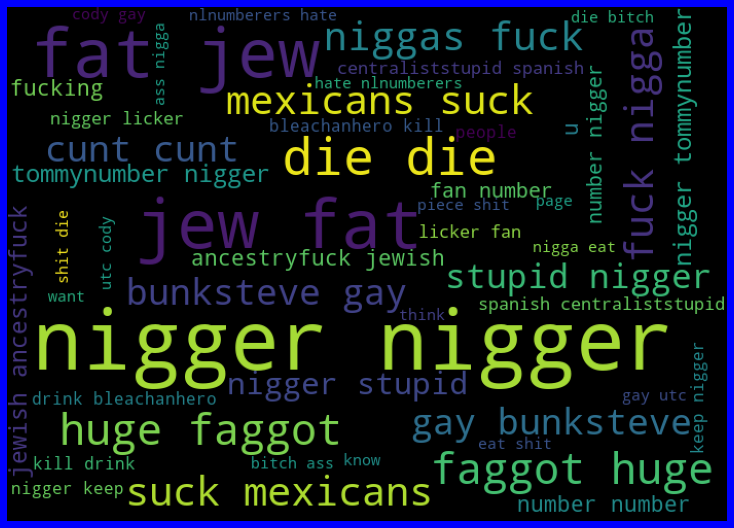

In [27]:
hams=df['comment_text'][df['loathe']==1]
spam_cloud=WordCloud(width=700,height=500,background_color='black',max_words=50).generate(' '.join(hams))

plt.figure(figsize=(10,8),facecolor='b')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [28]:
df

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length,clean_length
0,explanation edits made username hardcore metal...,0,0,0,0,0,0,264,172
1,aww matches background colour seemingly stuck ...,0,0,0,0,0,0,112,97
2,hey man really trying edit war guy constantly ...,0,0,0,0,0,0,233,141
3,make real suggestions improvement wondered sec...,0,0,0,0,0,0,622,374
4,sir hero chance remember page,0,0,0,0,0,0,67,29
...,...,...,...,...,...,...,...,...,...
159566,second time asking view completely contradicts...,0,0,0,0,0,0,295,181
159567,ashamed horrible thing put talk page number nu...,0,0,0,0,0,0,99,50
159568,spitzer umm theres actual article prostitution...,0,0,0,0,0,0,81,66
159569,looks like actually put speedy first version d...,0,0,0,0,0,0,116,57


In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report

mnb=MultinomialNB()
svc=SVC()
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()


In [30]:
X=df['comment_text']
Y=df['malignant']

tfid=TfidfVectorizer()

In [31]:
X=tfid.fit_transform(X)
X

<159571x180227 sparse matrix of type '<class 'numpy.float64'>'
	with 4396574 stored elements in Compressed Sparse Row format>

In [32]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=42)

In [33]:
#SVC
svc.fit(x_train,y_train)
svc.score(x_train,y_train)

0.9865890138538411

In [34]:
svc_pred=svc.predict(x_test)
print("Accuracy score :",accuracy_score(y_test,svc_pred))
print("Classification report :",classification_report(y_test,svc_pred))

Accuracy score : 0.9569348005915825
Classification report :               precision    recall  f1-score   support

           0       0.96      0.99      0.98     36078
           1       0.92      0.60      0.73      3815

    accuracy                           0.96     39893
   macro avg       0.94      0.80      0.85     39893
weighted avg       0.96      0.96      0.95     39893



In [35]:
#MNB
mnb.fit(x_train,y_train)
mnb.score(x_train,y_train)

0.9236952489179298

In [36]:
mnb_pred=mnb.predict(x_test)
print("Accuracy score :",accuracy_score(y_test,mnb_pred))
print("Classification report :",classification_report(y_test,mnb_pred))

Accuracy score : 0.9205875717544432
Classification report :               precision    recall  f1-score   support

           0       0.92      1.00      0.96     36078
           1       0.98      0.17      0.29      3815

    accuracy                           0.92     39893
   macro avg       0.95      0.59      0.63     39893
weighted avg       0.93      0.92      0.89     39893



In [37]:
#DTC
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)

0.999749327361754

In [38]:
dtc_pred=dtc.predict(x_test)
print("Accuracy score :",accuracy_score(y_test,dtc_pred))
print("Classification report :",classification_report(y_test,dtc_pred))

Accuracy score : 0.9434988594490261
Classification report :               precision    recall  f1-score   support

           0       0.97      0.97      0.97     36078
           1       0.71      0.70      0.70      3815

    accuracy                           0.94     39893
   macro avg       0.84      0.83      0.84     39893
weighted avg       0.94      0.94      0.94     39893



In [39]:
#RTC
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train)

0.9997159043433212

In [40]:
rfc_pred=rfc.predict(x_test)
print("Accuracy score :",accuracy_score(y_test,rfc_pred))
print("Classification report :",classification_report(y_test,rfc_pred))

Accuracy score : 0.9526734013486076
Classification report :               precision    recall  f1-score   support

           0       0.95      0.99      0.97     36078
           1       0.92      0.55      0.69      3815

    accuracy                           0.95     39893
   macro avg       0.94      0.77      0.83     39893
weighted avg       0.95      0.95      0.95     39893



Support vector classifier is the best model with accurcy score of 95.69%.

In [69]:
svc_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)